In [3]:
# Removing the state and district column
import pandas as pd 
data = pd.read_csv("C:\\Users\\vivek\\Documents\\Vivek\\hackathon\\UIDAI-Data-Hackathon\\dataset\\Biometric.csv")

data = data.drop(['state','district'],axis=1)
print(data.head())

print(sorted(data['pincode'].unique()))

         date  pincode  bio_age_5_17  bio_age_17_
0  01-03-2025   400064           145          138
1  01-03-2025   400050           122          203
2  01-03-2025   400063            77          104
3  01-03-2025   400095           203          355
4  01-03-2025   400094            32           33
[np.int64(400024), np.int64(400029), np.int64(400042), np.int64(400043), np.int64(400049), np.int64(400050), np.int64(400051), np.int64(400052), np.int64(400053), np.int64(400054), np.int64(400055), np.int64(400056), np.int64(400057), np.int64(400058), np.int64(400059), np.int64(400060), np.int64(400061), np.int64(400063), np.int64(400064), np.int64(400065), np.int64(400066), np.int64(400067), np.int64(400068), np.int64(400069), np.int64(400070), np.int64(400071), np.int64(400072), np.int64(400074), np.int64(400075), np.int64(400076), np.int64(400077), np.int64(400078), np.int64(400079), np.int64(400080), np.int64(400081), np.int64(400082), np.int64(400083), np.int64(400084), np.int64(400085

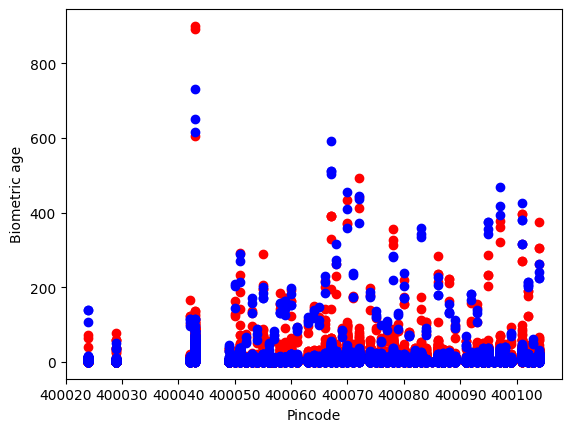

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['pincode'],data['bio_age_5_17'], color = 'red')
plt.scatter(data['pincode'], data['bio_age_17_'],color='blue')
plt.xlabel("Pincode")
plt.ylabel("Biometric age")
plt.show()

In [5]:
agg = data.groupby(['pincode'], as_index=False)[
    ['bio_age_5_17','bio_age_17_']
].sum()

agg['total'] = agg['bio_age_5_17'] + agg['bio_age_17_']
agg['ratio_above_to_child'] = (
    agg['bio_age_17_'] / agg['bio_age_5_17'].replace(0,pd.NA)
)
agg['child_share'] = agg['bio_age_5_17'] /agg['total']

In [ ]:
# Insight 1 - Getting the top_pincodes which has higher biometric
top_pincodes = (
    agg.groupby('pincode')
    .sum()
    .sort_values(by='total' ,ascending=False))
print(top_pincodes)

         bio_age_5_17  bio_age_17_  total  ratio_above_to_child  child_share
pincode                                                                     
400043          11750         9593  21343              0.816426     0.550532
400067           6804         7532  14336              1.106996     0.474609
400070           7403         5362  12765              0.724301     0.579945
400101           5898         5610  11508              0.951170     0.512513
400072           6770         4307  11077              0.636189     0.611176
400097           5497         4960  10457              0.902310     0.525677
400078           5870         3571   9441              0.608348     0.621756
400095           3818         4862   8680              1.273442     0.439862
400051           4300         3950   8250              0.918605     0.521212
400086           5093         3003   8096              0.589633     0.629076


In [ ]:
# Insight 2 - Getting the dominant age in pincode
pincode_age = agg.groupby('pincode')[[
    'bio_age_5_17', 'bio_age_17_'
]].sum()

print("Which pincode has larger child than adult0")
pincode_age['dominant_group'] = (
    pincode_age['bio_age_5_17'] > pincode_age['bio_age_17_']
)
print(pincode_age['dominant_group'].value_counts())

Which pincode has larger child than adult
dominant_group
True     42
False    14
Name: count, dtype: int64


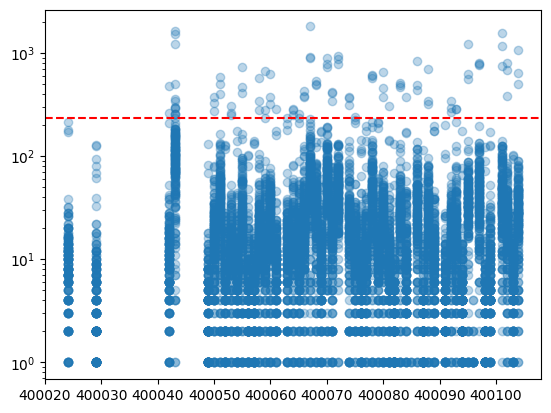

In [ ]:
# Insight 3 : Outliers
threshold = agg['total'].quantile(0.99)
outliers = agg[agg['total'] > threshold]

plt.scatter(agg['pincode'] , agg['total'],alpha=0.3)
plt.axhline(threshold,color='red', linestyle = '--')
plt.yscale('log')
plt.show()

In [34]:
date_trend = agg.groupby('date')[['bio_age_5_17','bio_age_17_']].sum()

date_trend.plot(figsize=(12,6))
plt.ylabel('Biometric count')
plt.show()

KeyError: 'date'

In [19]:
# Insight 5: Child v/s heavy adults
pincode_profile = agg.groupby('pincode')['child_share'].mean()

high_child = pincode_profile[pincode_profile > 0.6]
high_adult = pincode_profile[pincode_profile < 0.3]

print(high_adult)
print(high_child)

Series([], Name: child_share, dtype: float64)
pincode
400072    0.613831
400084    0.667184
400086    0.605163
Name: child_share, dtype: float64


In [20]:
agg[['bio_age_5_17' , 'bio_age_17_']].corr()

,bio_age_5_17,bio_age_17_
bio_age_5_17,1.000000,0.905669
bio_age_17_,0.905669,1.000000


In [24]:
pincode_daily = agg.groupby('pincode')['total'].mean().sort_values(ascending=False)
print(pincode_daily)

pincode
400043    119.234637
400067     73.142857
400070     66.484375
400072     59.553763
400101     59.319588
400097     56.220430
400078     51.309783
400095     49.600000
400051     43.882979
400086     41.306122
400104     40.571429
400068     39.527174
400055     34.860963
400083     34.167598
400102     33.878307
400088     32.850829
400060     30.385475
400074     29.659218
400066     29.564767
400080     28.750000
400071     28.098958
400058     24.776042
400093     24.096591
400092     22.702247
400050     22.390374
400059     22.286458
400064     21.201087
400065     18.525510
400079     17.355191
400053     17.169312
400042     16.594595
400075     16.415301
400084     16.064516
400063     15.912568
400089     14.291005
400077     14.221591
400069     13.894118
400081     12.950820
400024     12.602094
400061     12.549223
400054     11.471204
400099     11.238636
400076     10.775401
400052      9.683060
400103      9.574468
400029      8.384615
400057      8.217143
40009